<a href="https://colab.research.google.com/github/jrioss/demo-graf/blob/main/Bancolombia_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias
# Silent warnings
import warnings
warnings.filterwarnings("ignore")

# Core
import numpy as np
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

# Data
import pandas as pd
import sklearn.metrics
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

print("Ready!!")

Ready!!


In [2]:
# Leer la BD en csv

data = pd.read_csv('Bancolombia_Certificada Titular_2023_08_02 Anual.csv', sep = ',')
data.head()

,idguia,fechacomprobacionfisica,nombre_dia_semana,producto,ciudad_origen,ciudad_destino,departamento_destino,zona,barrio,biometrico,...,tipo_id_titular,tipo_tarjeta,documentos_a_diligenciar,forzar_cambio_direccion,tipo_cliente,direccion,calificacion,entregas,devoluciones,primer_intento
0,38329078,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,PEREIRA,RISARALDA,NaN,,NaN,...,1.0,MASTERCARD JOVEN,NaN,NaN,NaN,QUINTAS DE PINDANA CS 12,2.0,1.0,1.0,0.0
1,38329779,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,PEREIRA,RISARALDA,NaN,ZONA DEPORTIVA VILLA OLIMPICA Olimpica,NaN,...,1.0,VISA CLASICA,NaN,NaN,NaN,CR 25 85 80 CJ SAN SILVESTRE TR 3 AP 3103,10.0,1.0,NaN,1.0
2,38329635,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,ARMENIA,QUINDIO,NaN,CLARITA Comuna 6 - San José,NO,...,1.0,MASTERCARD CLASICA,NaN,NaN,NaN,CL 37 27 107,10.0,1.0,NaN,1.0
3,38329014,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,MANIZALES,CALDAS,NaN,El Trebol Comuna 8 - Palogrande,NO,...,1.0,MASTERCARD BLACK,NaN,NaN,NaN,CR 27 81 C 04 CA 20,8.0,1.0,NaN,1.0
4,38329119,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,MANIZALES,CALDAS,NaN,Alta Suiza Comuna 6 - Ecoturistico Cerro De Oro,NO,...,1.0,MASTERCARD JOVEN,NaN,NaN,NaN,CR 18 A 76 08,9.0,1.0,NaN,1.0


In [3]:
data['idguia'] = data['idguia'].astype('object')
data['sucursal_radicacion'] = data['sucursal_radicacion'].astype('object')
data['tipo_entrega'] = data['tipo_entrega'].astype('object')
data['tipo_doc_autorizado'] = data['tipo_doc_autorizado'].astype('object')
data['tipo_id_titular'] = data['tipo_id_titular'].astype('object')
data['calificacion'] = data['calificacion'].astype('object')
data['entregas'] = data['entregas'].astype('object')
data['devoluciones'] = data['devoluciones'].astype('object')
data['primer_intento'] = data['primer_intento'].astype('object')


In [4]:
data.shape

(1084608, 30)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177703 entries, 0 to 177702
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   idguia                    177703 non-null  int64  
 1   fechacomprobacionfisica   177604 non-null  object 
 2   nombre_dia_semana         177604 non-null  object 
 3   producto                  177702 non-null  object 
 4   ciudad_origen             177702 non-null  object 
 5   ciudad_destino            177702 non-null  object 
 6   departamento_destino      177702 non-null  object 
 7   zona                      70062 non-null   object 
 8   barrio                    132933 non-null  object 
 9   biometrico                141223 non-null  object 
 10  canal_de_venta            177702 non-null  object 
 11  cubrimiento               177702 non-null  object 
 12  idtipo_tarjeta            177702 non-null  object 
 13  planta_realce             177702 non-null  o

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177703 entries, 0 to 177702
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   idguia                    177703 non-null  object
 1   fechacomprobacionfisica   177604 non-null  object
 2   nombre_dia_semana         177604 non-null  object
 3   producto                  177702 non-null  object
 4   ciudad_origen             177702 non-null  object
 5   ciudad_destino            177702 non-null  object
 6   departamento_destino      177702 non-null  object
 7   zona                      70062 non-null   object
 8   barrio                    132933 non-null  object
 9   biometrico                141223 non-null  object
 10  canal_de_venta            177702 non-null  object
 11  cubrimiento               177702 non-null  object
 12  idtipo_tarjeta            177702 non-null  object
 13  planta_realce             177702 non-null  object
 14  segm

In [8]:
data.describe()

,idguia,fechacomprobacionfisica,nombre_dia_semana,producto,ciudad_origen,ciudad_destino,departamento_destino,zona,barrio,biometrico,...,tipo_id_titular,tipo_tarjeta,documentos_a_diligenciar,forzar_cambio_direccion,tipo_cliente,direccion,calificacion,entregas,devoluciones,primer_intento
count,177703,177604,177604,177702,177702,177702,177702,70062,132933,141223,...,177702.0,177702,38830,130,677,177702,146604.0,151616.0,85189.0,177702.0
unique,149251,33,6,10,6,717,34,815,8643,2,...,7.0,43,5,2,2,129027,9.0,4.0,19.0,2.0
top,38471414,2022-07-29,Viernes,PROCESOS ESPECIALES CER,MEDELLIN,MEDELLIN,ANTIOQUIA,Castilla,,NO,...,1.0,MASTERCARD DEBITO,02 03,SI,INFLUENCER,SIN INFORMACION,10.0,1.0,1.0,1.0
freq,2,12125,39756,73831,68148,49438,75709,1810,26324,138193,...,172156.0,52924,35772,82,615,3643,73670.0,151210.0,49469.0,89837.0


# tipo_id_titular

In [9]:
# Tabla de contingencia tipo_id_titular/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['tipo_id_titular'], margins=True)

tipo_id_titular,1.0,2.0,3.0,4.0,5.0,7.0,9.0,All
primer_intento,,,,,,,,
0.0,85138,347,1965,149,210,1,55,87865
1.0,87018,568,1952,201,70,0,28,89837
All,172156,915,3917,350,280,1,83,177702


In [10]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['tipo_id_titular'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

tipo_id_titular,1.0,2.0,3.0,4.0,5.0,7.0,9.0,All
primer_intento,,,,,,,,
0.0,47.910277,0.195270,1.105778,0.083848,0.118175,0.000563,0.030951,49.444860
1.0,48.968222,0.319634,1.098462,0.113110,0.039392,0.000000,0.015757,50.554577
All,96.878500,0.514904,2.204240,0.196958,0.157566,0.000563,0.046707,99.999437


In [11]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['tipo_id_titular']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

tipo_id_titular,1.0,2.0,3.0,4.0,5.0,7.0,9.0
primer_intento,,,,,,,
0.0,96.896375,0.394924,2.236385,0.169578,0.239003,0.001138,0.062596
1.0,96.862095,0.632256,2.172824,0.223739,0.077919,0.000000,0.031168


In [12]:
# tabla de contingencia en porcentajes relativos segun tipo_id_titular

pd.crosstab(index = data['primer_intento'], columns = data['tipo_id_titular']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

tipo_id_titular,1.0,2.0,3.0,4.0,5.0,7.0,9.0
primer_intento,,,,,,,
0.0,49.453984,37.923497,50.165943,42.571429,75.0,100.0,66.26506
1.0,50.546016,62.076503,49.834057,57.428571,25.0,0.0,33.73494


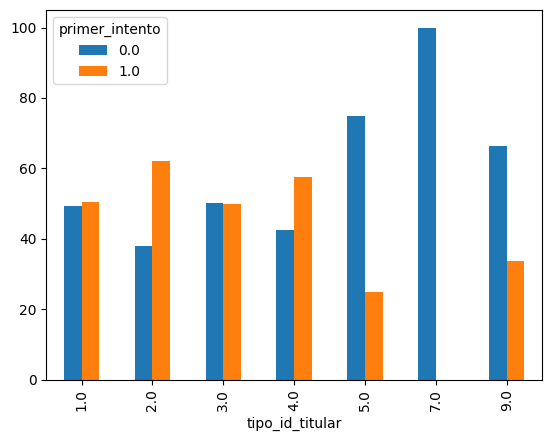

In [13]:
# Gráfico de barras de primer entrega segun clase
plot = pd.crosstab(index = data['tipo_id_titular'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

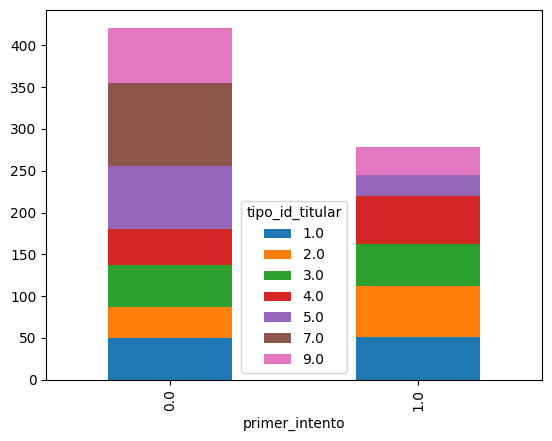

In [14]:
# Gráfico de barras de primera entrega segun clase

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['tipo_id_titular']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Id tipo de tarjeta

In [15]:
# Tabla de contingencia idtipo_tarjeta/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['idtipo_tarjeta'], margins=True)

idtipo_tarjeta,CREDITO,DEBITO,All
primer_intento,,,
0.0,84049,3816,87865
1.0,84929,4908,89837
All,168978,8724,177702


In [16]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['idtipo_tarjeta'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

idtipo_tarjeta,CREDITO,DEBITO,All
primer_intento,,,
0.0,47.297457,2.147403,49.444860
1.0,47.792665,2.761912,50.554577
All,95.090122,4.909315,99.999437


In [17]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['idtipo_tarjeta']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

idtipo_tarjeta,CREDITO,DEBITO
primer_intento,,
0.0,95.656974,4.343026
1.0,94.536772,5.463228


In [18]:
# tabla de contingencia en porcentajes relativos segun idtipo_tarjeta

pd.crosstab(index = data['primer_intento'], columns = data['idtipo_tarjeta']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

idtipo_tarjeta,CREDITO,DEBITO
primer_intento,,
0.0,49.739611,43.741403
1.0,50.260389,56.258597


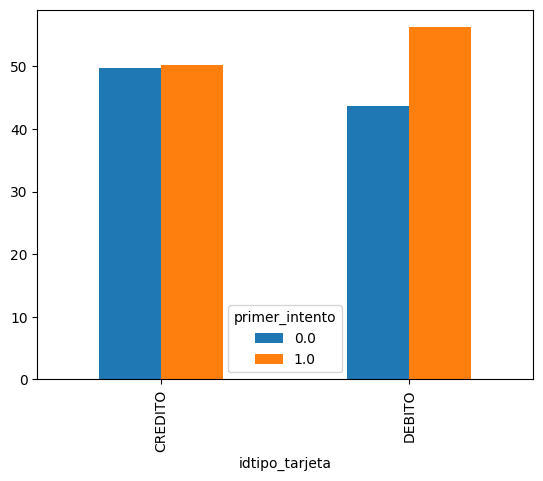

In [19]:
# Gráfico de barras de primer entrega segun idtipo_tarjeta
plot = pd.crosstab(index = data['idtipo_tarjeta'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

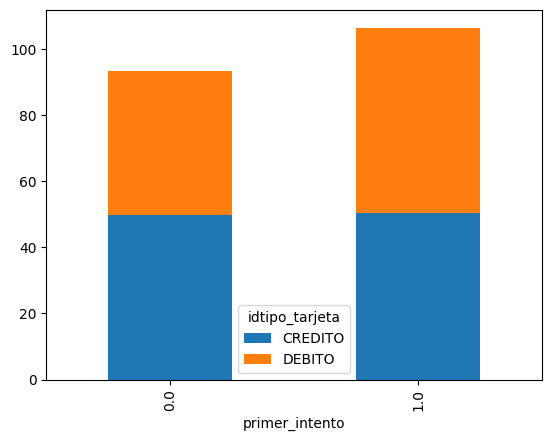

In [20]:
# Gráfico de barras de primera entrega segun idtipo_tarjeta

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['idtipo_tarjeta']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Tipo de tarjeta

In [21]:
# Tabla de contingencia tipo_tarjeta/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['tipo_tarjeta'], margins=True)

tipo_tarjeta,AMERICAN EXPRESS AZUL,AMERICAN EXPRESS BUSINESS GOLD,AMERICAN EXPRESS BUSINESS GREEN,AMERICAN EXPRESS LIBRE,AMERICAN EXPRESS ORO,AMERICAN EXPRESS PLATINUM,AMERICAN EXPRESS VERDE,CTA MASTERCARD,DEBITO BLACK,DEBITO PYME,...,VISA CLASICA,VISA EMPRESARIAL,VISA EMPRESARIAL CONAVI,VISA FUTBOL,VISA INFINITE,VISA LIFEMILES MICROPYME,VISA LIFEMILES PYME,VISA ORO,VISA PLATINUM,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,1508,19,15,5566,2537,367,904,7,186,802,...,7668,168,155,415,487,83,175,2363,678,87865
1.0,1914,39,22,7979,3676,752,1136,11,502,818,...,11064,276,430,528,1151,63,301,3790,1281,89837
All,3422,58,37,13545,6213,1119,2040,18,688,1620,...,18732,444,585,943,1638,146,476,6153,1959,177702


In [22]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['tipo_tarjeta'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

tipo_tarjeta,AMERICAN EXPRESS AZUL,AMERICAN EXPRESS BUSINESS GOLD,AMERICAN EXPRESS BUSINESS GREEN,AMERICAN EXPRESS LIBRE,AMERICAN EXPRESS ORO,AMERICAN EXPRESS PLATINUM,AMERICAN EXPRESS VERDE,CTA MASTERCARD,DEBITO BLACK,DEBITO PYME,...,VISA CLASICA,VISA EMPRESARIAL,VISA EMPRESARIAL CONAVI,VISA FUTBOL,VISA INFINITE,VISA LIFEMILES MICROPYME,VISA LIFEMILES PYME,VISA ORO,VISA PLATINUM,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.848607,0.010692,0.008441,3.132192,1.427663,0.206524,0.508714,0.003939,0.104669,0.451315,...,4.315065,0.094540,0.087224,0.233536,0.274053,0.046707,0.098479,1.329747,0.381535,49.444860
1.0,1.077078,0.021947,0.012380,4.490076,2.068620,0.423178,0.639269,0.006190,0.282494,0.460319,...,6.226119,0.155315,0.241977,0.297125,0.647710,0.035452,0.169384,2.132772,0.720866,50.554577
All,1.925685,0.032639,0.020821,7.622269,3.496283,0.629702,1.147983,0.010129,0.387163,0.911633,...,10.541184,0.249855,0.329201,0.530661,0.921763,0.082160,0.267863,3.462519,1.102401,99.999437


In [23]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['tipo_tarjeta']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

tipo_tarjeta,AMERICAN EXPRESS AZUL,AMERICAN EXPRESS BUSINESS GOLD,AMERICAN EXPRESS BUSINESS GREEN,AMERICAN EXPRESS LIBRE,AMERICAN EXPRESS ORO,AMERICAN EXPRESS PLATINUM,AMERICAN EXPRESS VERDE,CTA MASTERCARD,DEBITO BLACK,DEBITO PYME,...,TMN PAYPASS,VISA CLASICA,VISA EMPRESARIAL,VISA EMPRESARIAL CONAVI,VISA FUTBOL,VISA INFINITE,VISA LIFEMILES MICROPYME,VISA LIFEMILES PYME,VISA ORO,VISA PLATINUM
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,1.716269,0.021624,0.017072,6.334718,2.887384,0.417686,1.028851,0.007967,0.211688,0.912764,...,0.628236,8.727024,0.191202,0.176407,0.472315,0.554259,0.094463,0.199169,2.689353,0.771638
1.0,2.130525,0.043412,0.024489,8.881641,4.091855,0.837072,1.264512,0.012244,0.558790,0.910538,...,1.234458,12.315638,0.307223,0.478645,0.587731,1.281209,0.070127,0.335051,4.218752,1.425916


In [24]:
# tabla de contingencia en porcentajes relativos segun tipo_tarjeta

pd.crosstab(index = data['primer_intento'], columns = data['tipo_tarjeta']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

tipo_tarjeta,AMERICAN EXPRESS AZUL,AMERICAN EXPRESS BUSINESS GOLD,AMERICAN EXPRESS BUSINESS GREEN,AMERICAN EXPRESS LIBRE,AMERICAN EXPRESS ORO,AMERICAN EXPRESS PLATINUM,AMERICAN EXPRESS VERDE,CTA MASTERCARD,DEBITO BLACK,DEBITO PYME,...,TMN PAYPASS,VISA CLASICA,VISA EMPRESARIAL,VISA EMPRESARIAL CONAVI,VISA FUTBOL,VISA INFINITE,VISA LIFEMILES MICROPYME,VISA LIFEMILES PYME,VISA ORO,VISA PLATINUM
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,44.067797,32.758621,40.540541,41.092654,40.833736,32.79714,44.313725,38.888889,27.034884,49.506173,...,33.232992,40.935298,37.837838,26.495726,44.008484,29.73138,56.849315,36.764706,38.404031,34.609495
1.0,55.932203,67.241379,59.459459,58.907346,59.166264,67.20286,55.686275,61.111111,72.965116,50.493827,...,66.767008,59.064702,62.162162,73.504274,55.991516,70.26862,43.150685,63.235294,61.595969,65.390505


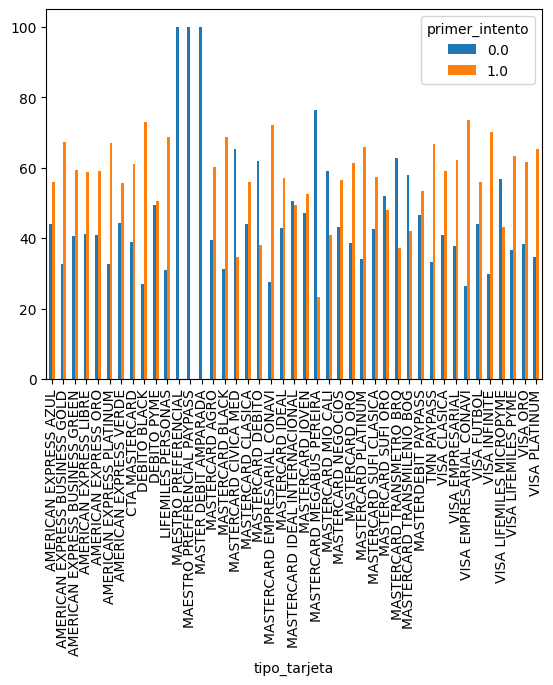

In [25]:
# Gráfico de barras de primer entrega segun tipo_tarjeta
plot = pd.crosstab(index = data['tipo_tarjeta'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

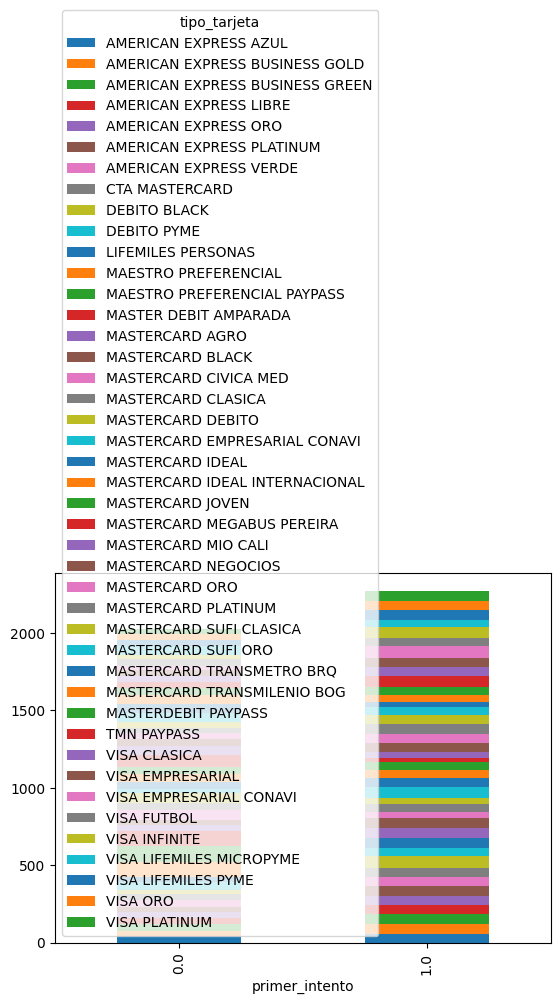

In [26]:
# Gráfico de barras de primera entrega segun tipo_tarjeta

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['tipo_tarjeta']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Calificación

In [27]:
# Tabla de contingencia calificación/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['calificacion'], margins=True)

calificacion,1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,All
primer_intento,,,,,,,,,,
0.0,6003,3302,6551,152,119,1306,10730,17993,31558,77714
1.0,563,411,1405,51,64,338,6908,17038,42112,68890
All,6566,3713,7956,203,183,1644,17638,35031,73670,146604


In [28]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['calificacion'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

calificacion,1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,All
primer_intento,,,,,,,,,,
0.0,3.378108,1.858157,3.686488,0.085536,0.066966,0.734934,6.038165,10.125321,17.758845,43.732520
1.0,0.316821,0.231285,0.790645,0.028700,0.036015,0.190205,3.887385,9.587908,23.697968,38.766931
All,3.694929,2.089441,4.477133,0.114236,0.102981,0.925139,9.925550,19.713229,41.456813,82.499451


In [29]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['calificacion']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

calificacion,1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0
primer_intento,,,,,,,,,
0.0,7.724477,4.248913,8.429627,0.195589,0.153126,1.680521,13.807036,23.152842,40.607870
1.0,0.817245,0.596603,2.039483,0.074031,0.092902,0.490637,10.027580,24.732182,61.129337


In [30]:
# tabla de contingencia en porcentajes relativos segun calificacion

pd.crosstab(index = data['primer_intento'], columns = data['calificacion']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

calificacion,1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0
primer_intento,,,,,,,,,
0.0,91.425525,88.930784,82.340372,74.876847,65.027322,79.440389,60.834562,51.363078,42.836976
1.0,8.574475,11.069216,17.659628,25.123153,34.972678,20.559611,39.165438,48.636922,57.163024


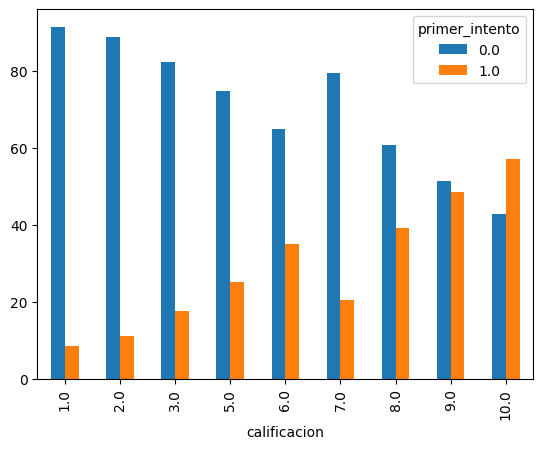

In [31]:
# Gráfico de barras de primer entrega segun calificacion
plot = pd.crosstab(index = data['calificacion'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

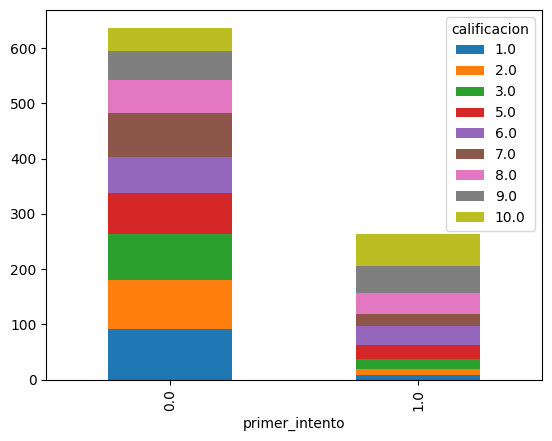

In [32]:
# Gráfico de barras de primera entrega segun calificacion

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['calificacion']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Canal de venta

In [33]:
# Tabla de contingencia canal_de_venta/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['canal_de_venta'], margins=True)

canal_de_venta,BEG,DEBITO,FRAUDE,NUEVAS PYME,NUEVAS SUCURSAL,NUEVAS VIRTUALES,PROCESOS ESPECIALES,SEGUNDAS VECES,SEGUNDAS VECES PYME,TELEVENTAS,UPGRADE,All
primer_intento,,,,,,,,,,,,
0.0,226,3816,1449,1543,12617,3777,46106,7585,768,9968,10,87865
1.0,693,4908,2857,2552,21497,3483,27725,10520,814,14764,24,89837
All,919,8724,4306,4095,34114,7260,73831,18105,1582,24732,34,177702


In [34]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['canal_de_venta'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

canal_de_venta,BEG,DEBITO,FRAUDE,NUEVAS PYME,NUEVAS SUCURSAL,NUEVAS VIRTUALES,PROCESOS ESPECIALES,SEGUNDAS VECES,SEGUNDAS VECES PYME,TELEVENTAS,UPGRADE,All
primer_intento,,,,,,,,,,,,
0.0,0.127178,2.147403,0.815405,0.868303,7.100049,2.125457,25.945538,4.268358,0.432182,5.609359,0.005627,49.444860
1.0,0.389977,2.761912,1.607739,1.436104,12.097151,1.960012,15.601875,5.919990,0.458068,8.308245,0.013506,50.554577
All,0.517155,4.909315,2.423144,2.304407,19.197200,4.085468,41.547413,10.188348,0.890249,13.917604,0.019133,99.999437


In [35]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['canal_de_venta']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

canal_de_venta,BEG,DEBITO,FRAUDE,NUEVAS PYME,NUEVAS SUCURSAL,NUEVAS VIRTUALES,PROCESOS ESPECIALES,SEGUNDAS VECES,SEGUNDAS VECES PYME,TELEVENTAS,UPGRADE
primer_intento,,,,,,,,,,,
0.0,0.257213,4.343026,1.649121,1.756103,14.359529,4.298640,52.473681,8.632561,0.874068,11.344676,0.011381
1.0,0.771397,5.463228,3.180204,2.840700,23.928893,3.877022,30.861449,11.710097,0.906085,16.434209,0.026715


In [36]:
# tabla de contingencia en porcentajes relativos segun canal_de_venta

pd.crosstab(index = data['primer_intento'], columns = data['canal_de_venta']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

canal_de_venta,BEG,DEBITO,FRAUDE,NUEVAS PYME,NUEVAS SUCURSAL,NUEVAS VIRTUALES,PROCESOS ESPECIALES,SEGUNDAS VECES,SEGUNDAS VECES PYME,TELEVENTAS,UPGRADE
primer_intento,,,,,,,,,,,
0.0,24.591948,43.741403,33.65072,37.680098,36.984816,52.024793,62.448023,41.894504,48.546144,40.30406,29.411765
1.0,75.408052,56.258597,66.34928,62.319902,63.015184,47.975207,37.551977,58.105496,51.453856,59.69594,70.588235


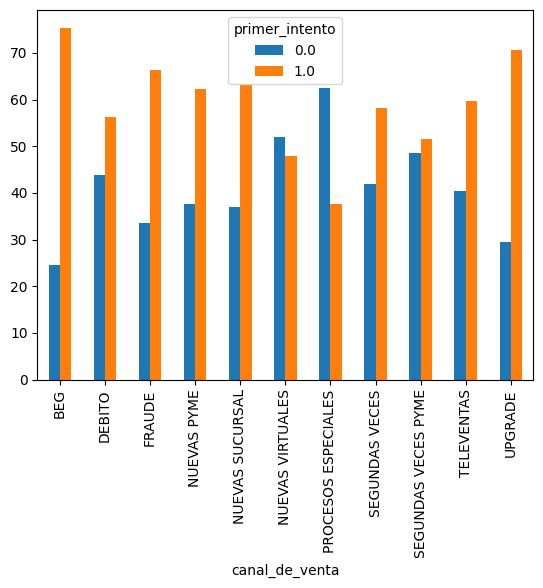

In [37]:
# Gráfico de barras de primer entrega segun canal_de_venta
plot = pd.crosstab(index = data['canal_de_venta'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

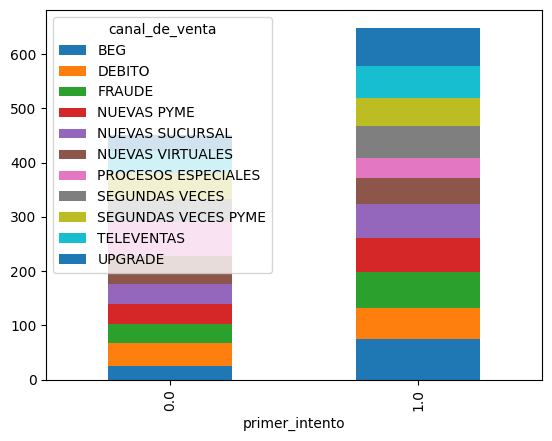

In [38]:
# Gráfico de barras de primera entrega segun canal_de_venta

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['canal_de_venta']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Producto

In [39]:
# Tabla de contingencia Producto/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['producto'], margins=True)

producto,CERTIFICADA AUTORIZADA,CERTIFICADA TITULAR,CERTIFICADA VIP,ENTREGA BAJO PUERTA,F EXCLUSIVO,PERSONALIZADA CON AGENDAMIENTO,PERSONALIZADA SIN AGENDAMIENTO,PREAPROBADO DIG CERTIFICADA,PROCESOS ESPECIALES CER,UPGRADE,All
primer_intento,,,,,,,,,,,
0.0,667,20354,226,3065,900,5903,6857,3777,46106,10,87865
1.0,1088,22839,693,6442,1507,10436,15600,3483,27725,24,89837
All,1755,43193,919,9507,2407,16339,22457,7260,73831,34,177702


In [40]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['producto'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

producto,CERTIFICADA AUTORIZADA,CERTIFICADA TITULAR,CERTIFICADA VIP,ENTREGA BAJO PUERTA,F EXCLUSIVO,PERSONALIZADA CON AGENDAMIENTO,PERSONALIZADA SIN AGENDAMIENTO,PREAPROBADO DIG CERTIFICADA,PROCESOS ESPECIALES CER,UPGRADE,All
primer_intento,,,,,,,,,,,
0.0,0.375345,11.453943,0.127178,1.724788,0.506463,3.321835,3.858686,2.125457,25.945538,0.005627,49.444860
1.0,0.612258,12.852344,0.389977,3.625150,0.848044,5.872720,8.778693,1.960012,15.601875,0.013506,50.554577
All,0.987603,24.306286,0.517155,5.349938,1.354507,9.194555,12.637378,4.085468,41.547413,0.019133,99.999437


In [41]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['producto']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

producto,CERTIFICADA AUTORIZADA,CERTIFICADA TITULAR,CERTIFICADA VIP,ENTREGA BAJO PUERTA,F EXCLUSIVO,PERSONALIZADA CON AGENDAMIENTO,PERSONALIZADA SIN AGENDAMIENTO,PREAPROBADO DIG CERTIFICADA,PROCESOS ESPECIALES CER,UPGRADE
primer_intento,,,,,,,,,,
0.0,0.759119,23.165083,0.257213,3.488306,1.024299,6.718261,7.804018,4.298640,52.473681,0.011381
1.0,1.211082,25.422710,0.771397,7.170765,1.677483,11.616594,17.364783,3.877022,30.861449,0.026715


In [42]:
# tabla de contingencia en porcentajes relativos segun producto

pd.crosstab(index = data['primer_intento'], columns = data['producto']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

producto,CERTIFICADA AUTORIZADA,CERTIFICADA TITULAR,CERTIFICADA VIP,ENTREGA BAJO PUERTA,F EXCLUSIVO,PERSONALIZADA CON AGENDAMIENTO,PERSONALIZADA SIN AGENDAMIENTO,PREAPROBADO DIG CERTIFICADA,PROCESOS ESPECIALES CER,UPGRADE
primer_intento,,,,,,,,,,
0.0,38.005698,47.123376,24.591948,32.239403,37.390943,36.128282,30.533909,52.024793,62.448023,29.411765
1.0,61.994302,52.876624,75.408052,67.760597,62.609057,63.871718,69.466091,47.975207,37.551977,70.588235


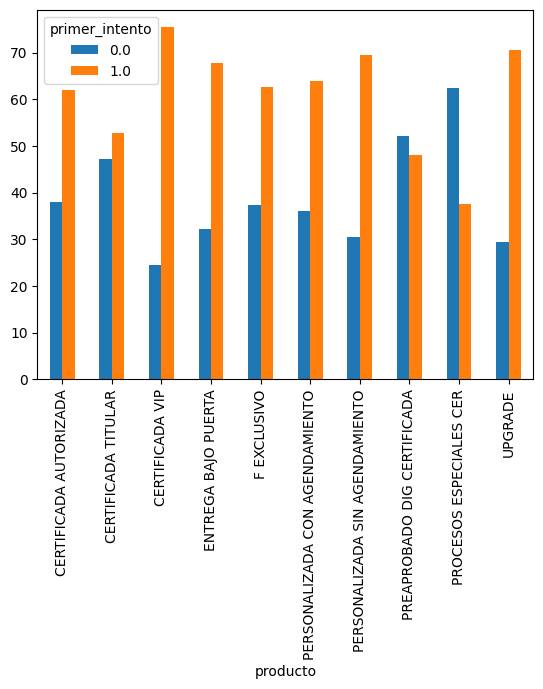

In [43]:
# Gráfico de barras de primer entrega segun producto
plot = pd.crosstab(index = data['producto'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

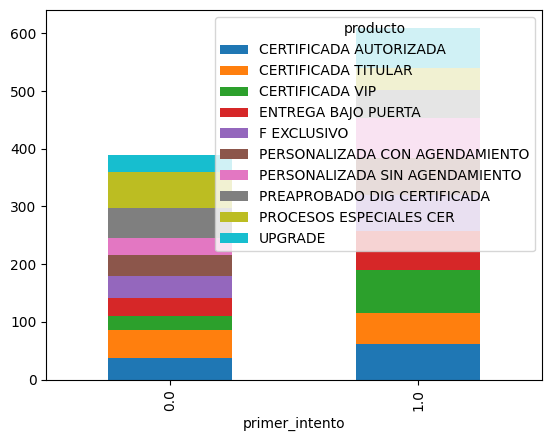

In [44]:
# Gráfico de barras de primera entrega segun producto

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['producto']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Planta realce

In [45]:
# Tabla de contingencia planta_realce/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['planta_realce'], margins=True)

planta_realce,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA,All
primer_intento,,,,,,,
0.0,3261,32774,3755,11135,33972,2968,87865
1.0,3904,32851,2731,12496,34176,3679,89837
All,7165,65625,6486,23631,68148,6647,177702


In [46]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['planta_realce'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

planta_realce,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA,All
primer_intento,,,,,,,
0.0,1.835084,18.443133,2.113076,6.266073,19.117291,1.670203,49.444860
1.0,2.196924,18.486463,1.536834,7.031958,19.232089,2.070308,50.554577
All,4.032008,36.929596,3.649910,13.298031,38.349381,3.740511,99.999437


In [47]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['planta_realce']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

planta_realce,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA
primer_intento,,,,,,
0.0,3.711375,37.300404,4.273602,12.672850,38.663859,3.377909
1.0,4.345648,36.567339,3.039950,13.909636,38.042232,4.095195


In [48]:
# tabla de contingencia en porcentajes relativos segun planta_realce

pd.crosstab(index = data['primer_intento'], columns = data['planta_realce']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

planta_realce,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA
primer_intento,,,,,,
0.0,45.51291,49.941333,57.893925,47.120308,49.850326,44.651723
1.0,54.48709,50.058667,42.106075,52.879692,50.149674,55.348277


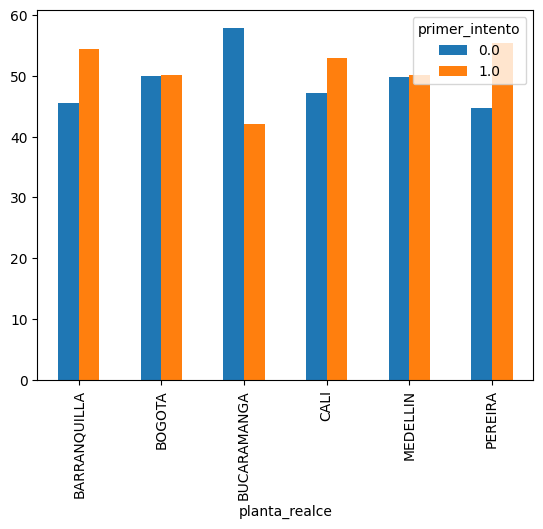

In [49]:
# Gráfico de barras de primer entrega segun planta_realce
plot = pd.crosstab(index = data['planta_realce'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

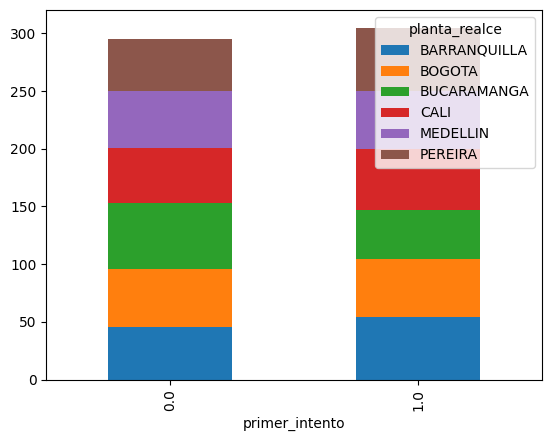

In [50]:
# Gráfico de barras de primera entrega segun planta_realce

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['planta_realce']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Documentos a diligenciar

In [51]:
# Tabla de contingencia documentos_a_diligenciar/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['documentos_a_diligenciar'], margins=True)

documentos_a_diligenciar,02 03,02 03 09,02 10,02 10 09,09,All
primer_intento,,,,,,
0.0,11739,50,864,20,97,12770
1.0,24033,138,1645,32,212,26060
All,35772,188,2509,52,309,38830


In [52]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['documentos_a_diligenciar'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

documentos_a_diligenciar,02 03,02 03 09,02 10,02 10 09,09,All
primer_intento,,,,,,
0.0,6.605966,0.028137,0.486205,0.011255,0.054585,7.186148
1.0,13.524251,0.077658,0.925702,0.018008,0.119300,14.664918
All,20.130217,0.105794,1.411906,0.029262,0.173886,21.851066


In [53]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['documentos_a_diligenciar']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

documentos_a_diligenciar,02 03,02 03 09,02 10,02 10 09,09
primer_intento,,,,,
0.0,91.926390,0.391543,6.765857,0.156617,0.759593
1.0,92.221796,0.529547,6.312356,0.122794,0.813507


In [54]:
# tabla de contingencia en porcentajes relativos segun documentos_a_diligenciar

pd.crosstab(index = data['primer_intento'], columns = data['documentos_a_diligenciar']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

documentos_a_diligenciar,02 03,02 03 09,02 10,02 10 09,09
primer_intento,,,,,
0.0,32.816169,26.595745,34.43603,38.461538,31.391586
1.0,67.183831,73.404255,65.56397,61.538462,68.608414


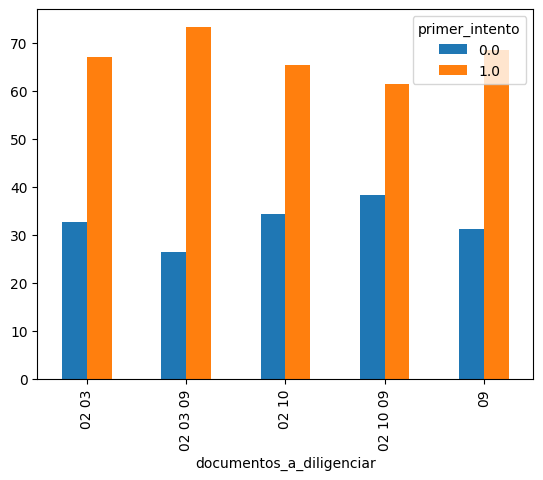

In [55]:
# Gráfico de barras de primer entrega segun documentos_a_diligenciar
plot = pd.crosstab(index = data['documentos_a_diligenciar'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

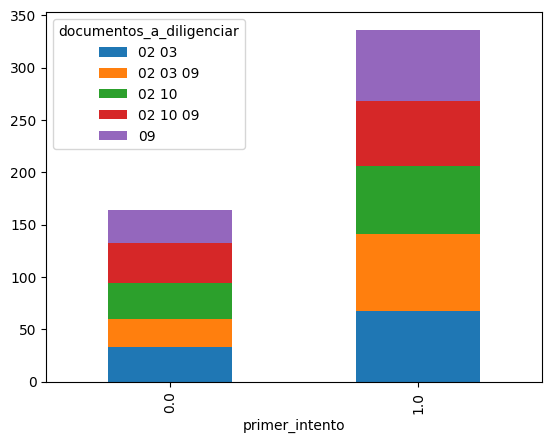

In [56]:
# Gráfico de barras de primera entrega segun documentos_a_diligenciar

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['documentos_a_diligenciar']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Tipo emisión

In [57]:
# Tabla de contingencia tipo_emision/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['tipo_emision'], margins=True)

tipo_emision,CAMBIO CLASE,DUPLICADO,ING.ESPECIAL PLAN 02,INGRESO ESPECIAL,INGRESO NORMAL,INGRESO TARJETA AMPA,MIGRACION MASTERDEBIT,MOTOR USO INMEDIATO,NORMAL PREAPROBADAS,PRE APROBADOS VIRTUA,PREAPROBADO USO INME,REEXPEDICION,REEXPEDICION FRAUDE,RENOVACION MANUAL,REPOSICION DETERIORO,REPOSICION MAL REALC,SIN DOC INGRESO,SIN DOC PREAPROBADOS,All
primer_intento,,,,,,,,,,,,,,,,,,,
0.0,1852,33,98,15,5116,4,45114,191,11115,1677,1909,7635,1589,98,558,65,2313,8483,87865
1.0,3287,59,10,32,8757,0,26890,187,21839,1905,1391,8928,3070,188,1075,129,2805,9285,89837
All,5139,92,108,47,13873,4,72004,378,32954,3582,3300,16563,4659,286,1633,194,5118,17768,177702


In [58]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['tipo_emision'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

tipo_emision,CAMBIO CLASE,DUPLICADO,ING.ESPECIAL PLAN 02,INGRESO ESPECIAL,INGRESO NORMAL,INGRESO TARJETA AMPA,MIGRACION MASTERDEBIT,MOTOR USO INMEDIATO,NORMAL PREAPROBADAS,PRE APROBADOS VIRTUA,PREAPROBADO USO INME,REEXPEDICION,REEXPEDICION FRAUDE,RENOVACION MANUAL,REPOSICION DETERIORO,REPOSICION MAL REALC,SIN DOC INGRESO,SIN DOC PREAPROBADOS,All
primer_intento,,,,,,,,,,,,,,,,,,,
0.0,1.042188,0.018570,0.055148,0.008441,2.878961,0.002251,25.387304,0.107483,6.254818,0.943709,1.074264,4.296495,0.894189,0.055148,0.314007,0.036578,1.301610,4.773695,49.444860
1.0,1.849716,0.033201,0.005627,0.018008,4.927885,0.000000,15.131990,0.105232,12.289607,1.072013,0.782767,5.024113,1.727602,0.105794,0.604942,0.072593,1.578476,5.225010,50.554577
All,2.891904,0.051772,0.060776,0.026449,7.806846,0.002251,40.519293,0.212714,18.544425,2.015723,1.857031,9.320608,2.621790,0.160943,0.918949,0.109171,2.880086,9.998706,99.999437


In [59]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['tipo_emision']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

tipo_emision,CAMBIO CLASE,DUPLICADO,ING.ESPECIAL PLAN 02,INGRESO ESPECIAL,INGRESO NORMAL,INGRESO TARJETA AMPA,MIGRACION MASTERDEBIT,MOTOR USO INMEDIATO,NORMAL PREAPROBADAS,PRE APROBADOS VIRTUA,PREAPROBADO USO INME,REEXPEDICION,REEXPEDICION FRAUDE,RENOVACION MANUAL,REPOSICION DETERIORO,REPOSICION MAL REALC,SIN DOC INGRESO,SIN DOC PREAPROBADOS
primer_intento,,,,,,,,,,,,,,,,,,
0.0,2.107779,0.037558,0.111535,0.017072,5.822569,0.004552,51.344676,0.217379,12.650088,1.908610,2.172651,8.689467,1.808456,0.111535,0.635065,0.073977,2.632448,9.654584
1.0,3.658849,0.065674,0.011131,0.035620,9.747654,0.000000,29.931988,0.208155,24.309583,2.120507,1.548360,9.937999,3.417300,0.209268,1.196612,0.143593,3.122322,10.335385


In [60]:
# tabla de contingencia en porcentajes relativos segun tipo_emision

pd.crosstab(index = data['primer_intento'], columns = data['tipo_emision']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

tipo_emision,CAMBIO CLASE,DUPLICADO,ING.ESPECIAL PLAN 02,INGRESO ESPECIAL,INGRESO NORMAL,INGRESO TARJETA AMPA,MIGRACION MASTERDEBIT,MOTOR USO INMEDIATO,NORMAL PREAPROBADAS,PRE APROBADOS VIRTUA,PREAPROBADO USO INME,REEXPEDICION,REEXPEDICION FRAUDE,RENOVACION MANUAL,REPOSICION DETERIORO,REPOSICION MAL REALC,SIN DOC INGRESO,SIN DOC PREAPROBADOS
primer_intento,,,,,,,,,,,,,,,,,,
0.0,36.03814,35.869565,90.740741,31.914894,36.877388,100.0,62.654853,50.529101,33.728834,46.81742,57.848485,46.096722,34.106031,34.265734,34.170239,33.505155,45.193435,47.743134
1.0,63.96186,64.130435,9.259259,68.085106,63.122612,0.0,37.345147,49.470899,66.271166,53.18258,42.151515,53.903278,65.893969,65.734266,65.829761,66.494845,54.806565,52.256866


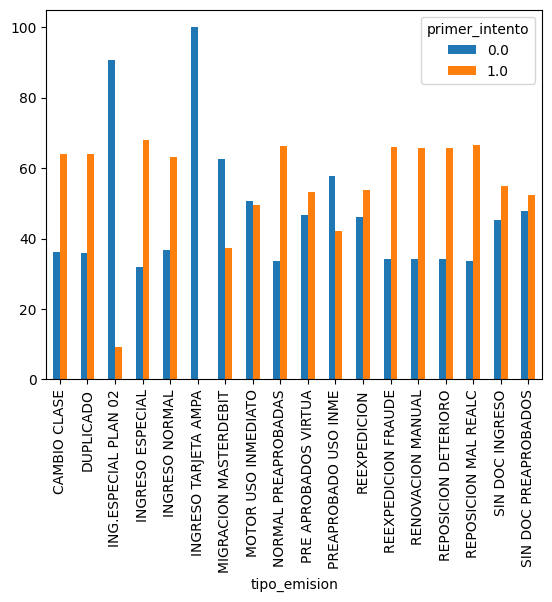

In [61]:
# Gráfico de barras de primer entrega segun tipo_emision
plot = pd.crosstab(index = data['tipo_emision'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

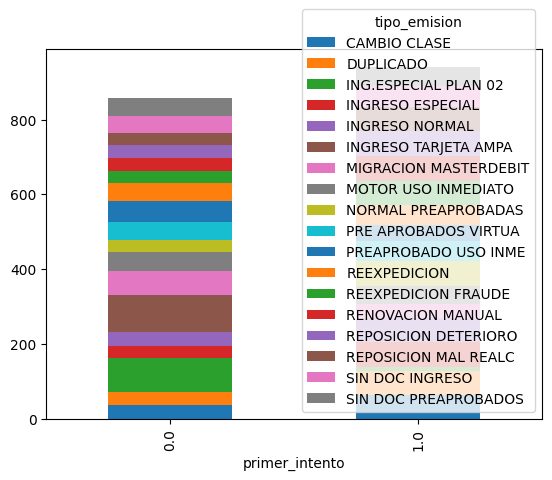

In [62]:
# Gráfico de barras de primera entrega segun tipo_emision

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['tipo_emision']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Segmento del cliente

In [63]:
# Tabla de contingencia segmento_cliente/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['segmento_cliente'], margins=True)

segmento_cliente,2,3,4,5,6,8,9,A,B,C,G,M,S,All
primer_intento,,,,,,,,,,,,,,
0.0,27,10,61002,1743,1941,0,7679,0,0,1,2,15402,58,87865
1.0,62,33,57129,2048,4441,3,6346,1,1,1,4,19712,56,89837
All,89,43,118131,3791,6382,3,14025,1,1,2,6,35114,114,177702


In [64]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['segmento_cliente'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

segmento_cliente,2,3,4,5,6,8,9,A,B,C,G,M,S,All
primer_intento,,,,,,,,,,,,,,
0.0,0.015194,0.005627,34.328064,0.980850,1.092272,0.000000,4.321255,0.000000,0.000000,0.000563,0.001125,8.667271,0.032639,49.444860
1.0,0.034890,0.018570,32.148585,1.152485,2.499114,0.001688,3.571127,0.000563,0.000563,0.000563,0.002251,11.092666,0.031513,50.554577
All,0.050084,0.024198,66.476649,2.133335,3.591386,0.001688,7.892382,0.000563,0.000563,0.001125,0.003376,19.759937,0.064152,99.999437


In [65]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['segmento_cliente']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

segmento_cliente,2,3,4,5,6,8,9,A,B,C,G,M,S
primer_intento,,,,,,,,,,,,,
0.0,0.030729,0.011381,69.426962,1.983725,2.209071,0.000000,8.739544,0.000000,0.000000,0.001138,0.002276,17.529164,0.066010
1.0,0.069014,0.036733,63.591839,2.279684,4.943397,0.003339,7.063905,0.001113,0.001113,0.001113,0.004453,21.941962,0.062335


In [66]:
# tabla de contingencia en porcentajes relativos segun segmento_cliente

pd.crosstab(index = data['primer_intento'], columns = data['segmento_cliente']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

segmento_cliente,2,3,4,5,6,8,9,A,B,C,G,M,S
primer_intento,,,,,,,,,,,,,
0.0,30.337079,23.255814,51.639282,45.977315,30.413663,0.0,54.752228,0.0,0.0,50.0,33.333333,43.862847,50.877193
1.0,69.662921,76.744186,48.360718,54.022685,69.586337,100.0,45.247772,100.0,100.0,50.0,66.666667,56.137153,49.122807


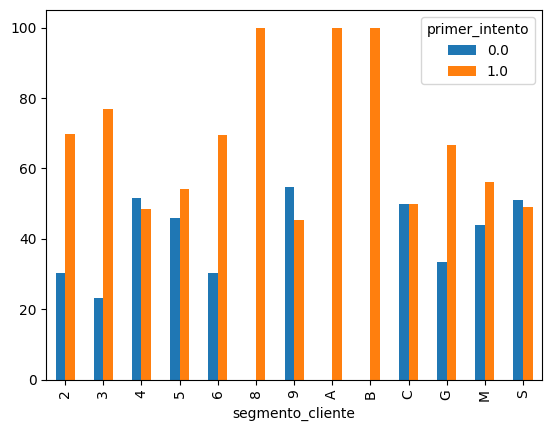

In [67]:
# Gráfico de barras de primer entrega segun segmento_cliente
plot = pd.crosstab(index = data['segmento_cliente'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

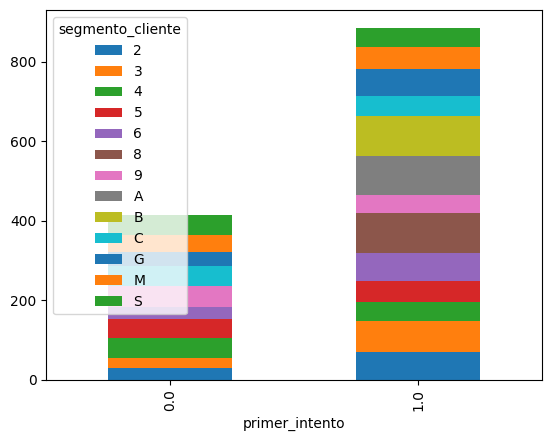

In [68]:
# Gráfico de barras de primera entrega segun segmento_cliente

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['segmento_cliente']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Tipo_doc_autorizado

In [69]:
# Tabla de contingencia tipo_doc_autorizado/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['tipo_doc_autorizado'], margins=True)

tipo_doc_autorizado,1.0,2.0,3.0,4.0,5.0,7.0,9.0,All
primer_intento,,,,,,,,
0.0,85138,347,1965,149,210,1,55,87865
1.0,87018,568,1952,201,70,0,28,89837
All,172156,915,3917,350,280,1,83,177702


In [70]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['tipo_doc_autorizado'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

tipo_doc_autorizado,1.0,2.0,3.0,4.0,5.0,7.0,9.0,All
primer_intento,,,,,,,,
0.0,47.910277,0.195270,1.105778,0.083848,0.118175,0.000563,0.030951,49.444860
1.0,48.968222,0.319634,1.098462,0.113110,0.039392,0.000000,0.015757,50.554577
All,96.878500,0.514904,2.204240,0.196958,0.157566,0.000563,0.046707,99.999437


In [71]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['tipo_doc_autorizado']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

tipo_doc_autorizado,1.0,2.0,3.0,4.0,5.0,7.0,9.0
primer_intento,,,,,,,
0.0,96.896375,0.394924,2.236385,0.169578,0.239003,0.001138,0.062596
1.0,96.862095,0.632256,2.172824,0.223739,0.077919,0.000000,0.031168


In [72]:
# tabla de contingencia en porcentajes relativos segun tipo_doc_autorizado

pd.crosstab(index = data['primer_intento'], columns = data['tipo_doc_autorizado']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

tipo_doc_autorizado,1.0,2.0,3.0,4.0,5.0,7.0,9.0
primer_intento,,,,,,,
0.0,49.453984,37.923497,50.165943,42.571429,75.0,100.0,66.26506
1.0,50.546016,62.076503,49.834057,57.428571,25.0,0.0,33.73494


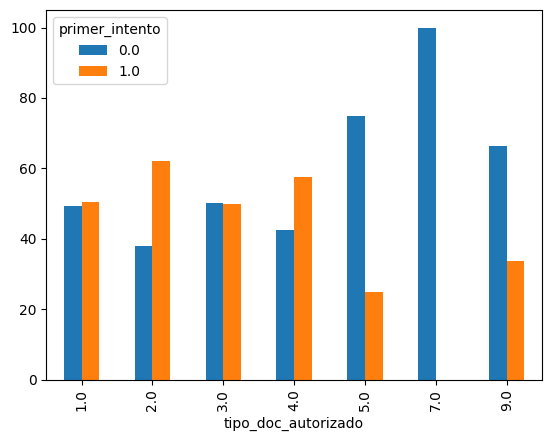

In [73]:
# Gráfico de barras de primer entrega segun tipo_doc_autorizado
plot = pd.crosstab(index = data['tipo_doc_autorizado'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

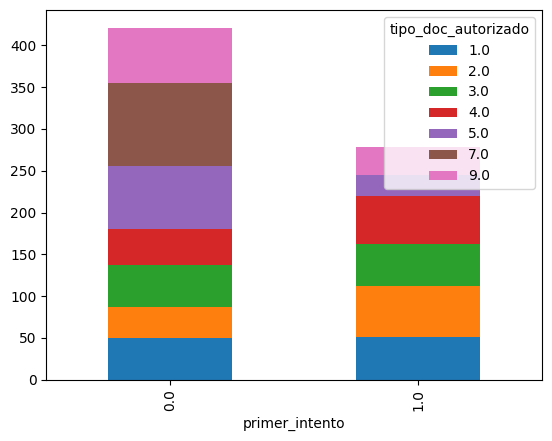

In [74]:
# Gráfico de barras de primera entrega segun tipo_doc_autorizado

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['tipo_doc_autorizado']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Ciudad origen

In [75]:
# Tabla de contingencia ciudad_origen/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['ciudad_origen'], margins=True)

ciudad_origen,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA,All
primer_intento,,,,,,,
0.0,3261,32774,3755,11135,33972,2968,87865
1.0,3904,32851,2731,12496,34176,3679,89837
All,7165,65625,6486,23631,68148,6647,177702


In [76]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['ciudad_origen'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

ciudad_origen,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA,All
primer_intento,,,,,,,
0.0,1.835084,18.443133,2.113076,6.266073,19.117291,1.670203,49.444860
1.0,2.196924,18.486463,1.536834,7.031958,19.232089,2.070308,50.554577
All,4.032008,36.929596,3.649910,13.298031,38.349381,3.740511,99.999437


In [77]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['ciudad_origen']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

ciudad_origen,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA
primer_intento,,,,,,
0.0,3.711375,37.300404,4.273602,12.672850,38.663859,3.377909
1.0,4.345648,36.567339,3.039950,13.909636,38.042232,4.095195


In [78]:
# tabla de contingencia en porcentajes relativos segun ciudad_origen

pd.crosstab(index = data['primer_intento'], columns = data['ciudad_origen']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

ciudad_origen,BARRANQUILLA,BOGOTA,BUCARAMANGA,CALI,MEDELLIN,PEREIRA
primer_intento,,,,,,
0.0,45.51291,49.941333,57.893925,47.120308,49.850326,44.651723
1.0,54.48709,50.058667,42.106075,52.879692,50.149674,55.348277


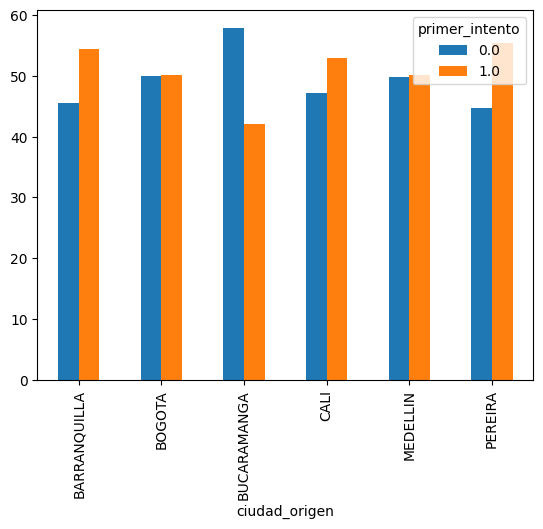

In [79]:
# Gráfico de barras de primer entrega segun ciudad_origen
plot = pd.crosstab(index = data['ciudad_origen'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

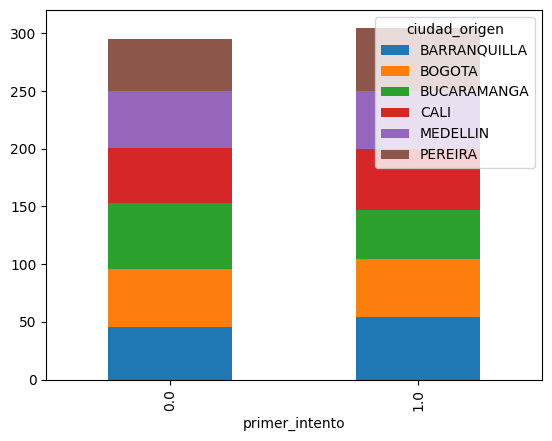

In [80]:
# Gráfico de barras de primera entrega segun ciudad_origen

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['ciudad_origen']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Ciudad destino

In [81]:
# Tabla de contingencia ciudad_destino/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['ciudad_destino'], margins=True)

ciudad_destino,ABEJORRAL,ABREGO,ACACIAS,ACANDI,ACEVEDO,AGRADO,AGUA DE DIOS,AGUACHICA,AGUADAS,AGUAZUL,...,YOTOCO,YUMBO,ZAMBRANO,ZAPATOCA,ZARAGOZA,ZARZAL,ZIPACON,ZIPAQUIRA,ZONA BANANERA,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,2,1,26,2,1,0,2,12,3,10,...,5,216,1,4,1,29,0,121,0,87865
1.0,2,3,17,0,5,2,0,42,6,33,...,14,277,1,0,0,40,1,136,1,89837
All,4,4,43,2,6,2,2,54,9,43,...,19,493,2,4,1,69,1,257,1,177702


In [82]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['ciudad_destino'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

ciudad_destino,ABEJORRAL,ABREGO,ACACIAS,ACANDI,ACEVEDO,AGRADO,AGUA DE DIOS,AGUACHICA,AGUADAS,AGUAZUL,...,YOTOCO,YUMBO,ZAMBRANO,ZAPATOCA,ZARAGOZA,ZARZAL,ZIPACON,ZIPAQUIRA,ZONA BANANERA,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.001125,0.000563,0.014631,0.001125,0.000563,0.000000,0.001125,0.006753,0.001688,0.005627,...,0.002814,0.121551,0.000563,0.002251,0.000563,0.016319,0.000000,0.068091,0.000000,49.444860
1.0,0.001125,0.001688,0.009567,0.000000,0.002814,0.001125,0.000000,0.023635,0.003376,0.018570,...,0.007878,0.155878,0.000563,0.000000,0.000000,0.022509,0.000563,0.076532,0.000563,50.554577
All,0.002251,0.002251,0.024198,0.001125,0.003376,0.001125,0.001125,0.030388,0.005065,0.024198,...,0.010692,0.277429,0.001125,0.002251,0.000563,0.038829,0.000563,0.144623,0.000563,99.999437


In [83]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['ciudad_destino']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

ciudad_destino,ABEJORRAL,ABREGO,ACACIAS,ACANDI,ACEVEDO,AGRADO,AGUA DE DIOS,AGUACHICA,AGUADAS,AGUAZUL,...,YOPAL,YOTOCO,YUMBO,ZAMBRANO,ZAPATOCA,ZARAGOZA,ZARZAL,ZIPACON,ZIPAQUIRA,ZONA BANANERA
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.002276,0.001138,0.029591,0.002276,0.001138,0.000000,0.002276,0.013657,0.003414,0.011381,...,0.350538,0.005691,0.245832,0.001138,0.004552,0.001138,0.033005,0.000000,0.137711,0.000000
1.0,0.002226,0.003339,0.018923,0.000000,0.005566,0.002226,0.000000,0.046751,0.006679,0.036733,...,0.642274,0.015584,0.308336,0.001113,0.000000,0.000000,0.044525,0.001113,0.151385,0.001113


In [84]:
# tabla de contingencia en porcentajes relativos segun ciudad_destino

pd.crosstab(index = data['primer_intento'], columns = data['ciudad_destino']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

ciudad_destino,ABEJORRAL,ABREGO,ACACIAS,ACANDI,ACEVEDO,AGRADO,AGUA DE DIOS,AGUACHICA,AGUADAS,AGUAZUL,...,YOPAL,YOTOCO,YUMBO,ZAMBRANO,ZAPATOCA,ZARAGOZA,ZARZAL,ZIPACON,ZIPAQUIRA,ZONA BANANERA
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,50.0,25.0,60.465116,100.0,16.666667,0.0,100.0,22.222222,33.333333,23.255814,...,34.80226,26.315789,43.813387,50.0,100.0,100.0,42.028986,0.0,47.081712,0.0
1.0,50.0,75.0,39.534884,0.0,83.333333,100.0,0.0,77.777778,66.666667,76.744186,...,65.19774,73.684211,56.186613,50.0,0.0,0.0,57.971014,100.0,52.918288,100.0


# Tipo de ciudad

In [85]:
# Tabla de contingencia tipo_ciudad/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['tipo_ciudad'], margins=True)

tipo_ciudad,A,B,C,D,E,All
primer_intento,,,,,,
0.0,50126,16309,6597,11953,2880,87865
1.0,59858,13233,6429,9494,823,89837
All,109984,29542,13026,21447,3703,177702


In [86]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['tipo_ciudad'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

tipo_ciudad,A,B,C,D,E,All
primer_intento,,,,,,
0.0,28.207740,9.177673,3.712374,6.726392,1.620682,49.444860
1.0,33.684293,7.446695,3.617834,5.342622,0.463132,50.554577
All,61.892033,16.624368,7.330208,12.069014,2.083814,99.999437


In [87]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['tipo_ciudad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

tipo_ciudad,A,B,C,D,E
primer_intento,,,,,
0.0,57.048882,18.561429,7.508109,13.603824,3.277756
1.0,66.629562,14.730011,7.156294,10.568029,0.916104


In [88]:
# tabla de contingencia en porcentajes relativos segun tipo_ciudad

pd.crosstab(index = data['primer_intento'], columns = data['tipo_ciudad']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

tipo_ciudad,A,B,C,D,E
primer_intento,,,,,
0.0,45.57572,55.206147,50.644864,55.732737,77.774777
1.0,54.42428,44.793853,49.355136,44.267263,22.225223


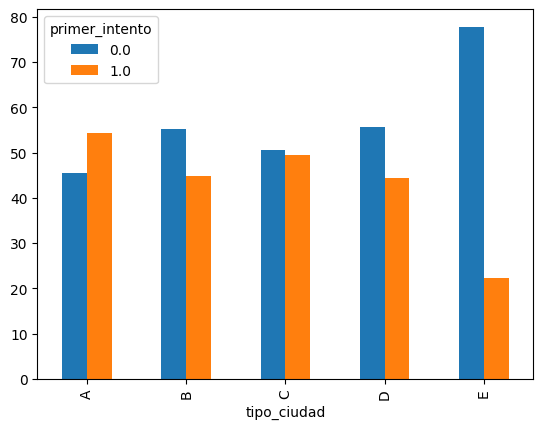

In [89]:
# Gráfico de barras de primer entrega segun tipo_ciudad
plot = pd.crosstab(index = data['tipo_ciudad'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

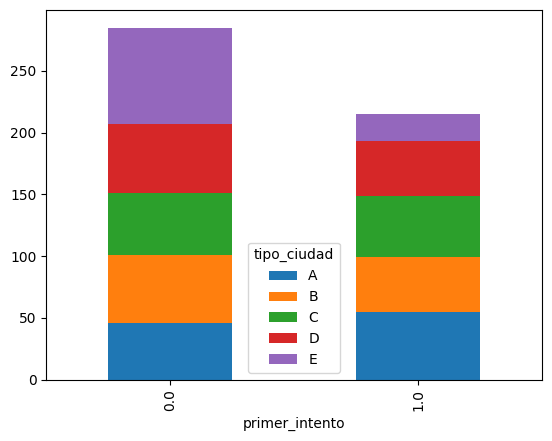

In [90]:
# Gráfico de barras de primera entrega segun tipo_ciudad

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['tipo_ciudad']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Zona

In [91]:
# Tabla de contingencia zona/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['zona'], margins=True)

zona,20 DE JULIO,ABAJO,ACACIAS USAQUEN,AEROPARQUE JUAN PABLO II,AGUACATAL,ALAMEDA,ALAMEDAS DEL SINU,ALAMOS,ALAMOS NORTE,ALBORAYA,...,Yumbo,ZONA CENTRO,ZONA COMERCIAL PUERTA DEL NORTE I Y II,ZONA INDUSTRIAL,ZONA INDUSTRIAL No. 2,ZONA INDUSTRIAL No. 3,ZONA RURAL,ZUNIGA,valladolid,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0,2,2,2,1,2,0,0,2,0,...,3,0,0,0,0,0,2,2,0,33256
1.0,4,6,6,0,0,0,14,2,0,2,...,4,12,16,2,2,4,0,4,2,36806
All,4,8,8,2,1,2,14,2,2,2,...,7,12,16,2,2,4,2,6,2,70062


In [92]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['zona'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

zona,20 DE JULIO,ABAJO,ACACIAS USAQUEN,AEROPARQUE JUAN PABLO II,AGUACATAL,ALAMEDA,ALAMEDAS DEL SINU,ALAMOS,ALAMOS NORTE,ALBORAYA,...,Yumbo,ZONA CENTRO,ZONA COMERCIAL PUERTA DEL NORTE I Y II,ZONA INDUSTRIAL,ZONA INDUSTRIAL No. 2,ZONA INDUSTRIAL No. 3,ZONA RURAL,ZUNIGA,valladolid,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.001125,0.001125,0.001125,0.000563,0.001125,0.000000,0.000000,0.001125,0.000000,...,0.001688,0.000000,0.000000,0.000000,0.000000,0.000000,0.001125,0.001125,0.000000,18.714372
1.0,0.002251,0.003376,0.003376,0.000000,0.000000,0.000000,0.007878,0.001125,0.000000,0.001125,...,0.002251,0.006753,0.009004,0.001125,0.001125,0.002251,0.000000,0.002251,0.001125,20.712087
All,0.002251,0.004502,0.004502,0.001125,0.000563,0.001125,0.007878,0.001125,0.001125,0.001125,...,0.003939,0.006753,0.009004,0.001125,0.001125,0.002251,0.001125,0.003376,0.001125,39.426459


In [93]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['zona']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

zona,20 DE JULIO,ABAJO,ACACIAS USAQUEN,AEROPARQUE JUAN PABLO II,AGUACATAL,ALAMEDA,ALAMEDAS DEL SINU,ALAMOS,ALAMOS NORTE,ALBORAYA,...,VILLAS DEL MADRIGAL,Yumbo,ZONA CENTRO,ZONA COMERCIAL PUERTA DEL NORTE I Y II,ZONA INDUSTRIAL,ZONA INDUSTRIAL No. 2,ZONA INDUSTRIAL No. 3,ZONA RURAL,ZUNIGA,valladolid
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.006014,0.006014,0.006014,0.003007,0.006014,0.000000,0.000000,0.006014,0.000000,...,0.006014,0.009021,0.000000,0.000000,0.000000,0.000000,0.000000,0.006014,0.006014,0.000000
1.0,0.010868,0.016302,0.016302,0.000000,0.000000,0.000000,0.038037,0.005434,0.000000,0.005434,...,0.000000,0.010868,0.032603,0.043471,0.005434,0.005434,0.010868,0.000000,0.010868,0.005434


In [94]:
# tabla de contingencia en porcentajes relativos segun zona

pd.crosstab(index = data['primer_intento'], columns = data['zona']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

zona,20 DE JULIO,ABAJO,ACACIAS USAQUEN,AEROPARQUE JUAN PABLO II,AGUACATAL,ALAMEDA,ALAMEDAS DEL SINU,ALAMOS,ALAMOS NORTE,ALBORAYA,...,VILLAS DEL MADRIGAL,Yumbo,ZONA CENTRO,ZONA COMERCIAL PUERTA DEL NORTE I Y II,ZONA INDUSTRIAL,ZONA INDUSTRIAL No. 2,ZONA INDUSTRIAL No. 3,ZONA RURAL,ZUNIGA,valladolid
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,25.0,25.0,100.0,100.0,100.0,0.0,0.0,100.0,0.0,...,100.0,42.857143,0.0,0.0,0.0,0.0,0.0,100.0,33.333333,0.0
1.0,100.0,75.0,75.0,0.0,0.0,0.0,100.0,100.0,0.0,100.0,...,0.0,57.142857,100.0,100.0,100.0,100.0,100.0,0.0,66.666667,100.0


# Biometrico

In [95]:
# Tabla de contingencia biometrico/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['biometrico'], margins=True)

biometrico,NO,SI,All
primer_intento,,,
0.0,68436,1374,69810
1.0,69757,1656,71413
All,138193,3030,141223


In [96]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['biometrico'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

biometrico,NO,SI,All
primer_intento,,,
0.0,38.511449,0.773200,39.284649
1.0,39.254824,0.931892,40.186716
All,77.766273,1.705092,79.471365


In [97]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['biometrico']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

biometrico,NO,SI
primer_intento,,
0.0,98.031801,1.968199
1.0,97.681094,2.318906


In [98]:
# tabla de contingencia en porcentajes relativos segun biometrico

pd.crosstab(index = data['primer_intento'], columns = data['biometrico']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

biometrico,NO,SI
primer_intento,,
0.0,49.522045,45.346535
1.0,50.477955,54.653465


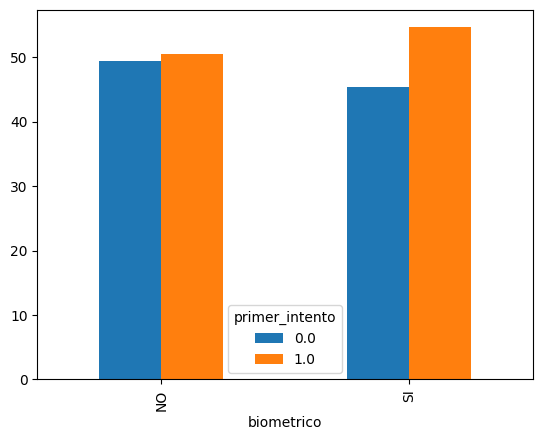

In [99]:
# Gráfico de barras de primer entrega segun biometrico
plot = pd.crosstab(index = data['biometrico'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

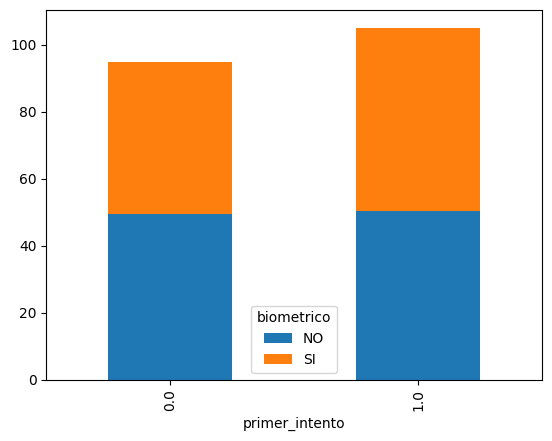

In [100]:
# Gráfico de barras de primera entrega segun biometrico

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['biometrico']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Departamento de destino

In [101]:
# Tabla de contingencia departamento_destino/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['departamento_destino'], margins=True)

departamento_destino,AMAZONAS,ANTIOQUIA,ARAUCA,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA,ATLANTICO,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,...,PUTUMAYO,QUINDIO,RISARALDA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPES,VICHADA,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,2,43368,27,37,2835,947,857,909,185,368,...,33,955,1894,2146,204,931,9589,1,7,87865
1.0,6,32341,56,8,4154,637,1039,1394,474,663,...,25,1269,1847,2456,360,951,11388,0,2,89837
All,8,75709,83,45,6989,1584,1896,2303,659,1031,...,58,2224,3741,4602,564,1882,20977,1,9,177702


In [102]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['departamento_destino'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

departamento_destino,AMAZONAS,ANTIOQUIA,ARAUCA,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA,ATLANTICO,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,...,PUTUMAYO,QUINDIO,RISARALDA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPES,VICHADA,All
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.001125,24.404765,0.015194,0.020821,1.595359,0.532912,0.482265,0.511528,0.104106,0.207087,...,0.018570,0.537414,1.065823,1.207633,0.114798,0.523908,5.396082,0.000563,0.003939,49.444860
1.0,0.003376,18.199468,0.031513,0.004502,2.337608,0.358463,0.584683,0.784455,0.266737,0.373094,...,0.014068,0.714113,1.039375,1.382081,0.202585,0.535163,6.408446,0.000000,0.001125,50.554577
All,0.004502,42.604233,0.046707,0.025323,3.932967,0.891375,1.066949,1.295983,0.370843,0.580182,...,0.032639,1.251526,2.105198,2.589714,0.317383,1.059070,11.804528,0.000563,0.005065,99.999437


In [103]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['departamento_destino']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

departamento_destino,AMAZONAS,ANTIOQUIA,ARAUCA,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA,ATLANTICO,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,...,NORTE DE SANTANDER,PUTUMAYO,QUINDIO,RISARALDA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPES,VICHADA
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,0.002276,49.357537,0.030729,0.042110,3.226541,1.077790,0.975360,1.034542,0.210550,0.418824,...,0.803505,0.037558,1.086895,2.155580,2.442383,0.232174,1.059580,10.913333,0.001138,0.007967
1.0,0.006679,35.999644,0.062335,0.008905,4.623930,0.709062,1.156539,1.551699,0.527622,0.738003,...,0.328372,0.027828,1.412558,2.055946,2.733840,0.400726,1.058584,12.676292,0.000000,0.002226


In [104]:
# tabla de contingencia en porcentajes relativos segun producto

pd.crosstab(index = data['primer_intento'], columns = data['departamento_destino']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

departamento_destino,AMAZONAS,ANTIOQUIA,ARAUCA,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA,ATLANTICO,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,...,NORTE DE SANTANDER,PUTUMAYO,QUINDIO,RISARALDA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPES,VICHADA
primer_intento,,,,,,,,,,,,,,,,,,,,,
0.0,25.0,57.28249,32.53012,82.222222,40.563743,59.785354,45.200422,39.470256,28.072838,35.693501,...,70.529471,56.896552,42.940647,50.628174,46.631899,36.170213,49.46865,45.71197,100.0,77.777778
1.0,75.0,42.71751,67.46988,17.777778,59.436257,40.214646,54.799578,60.529744,71.927162,64.306499,...,29.470529,43.103448,57.059353,49.371826,53.368101,63.829787,50.53135,54.28803,0.0,22.222222


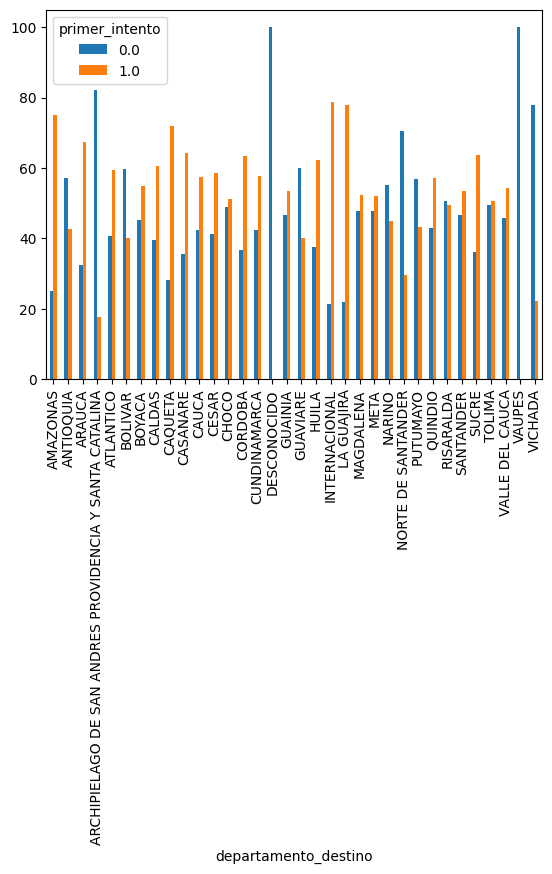

In [105]:
# Gráfico de barras de primer entrega segun departamento_destino
plot = pd.crosstab(index = data['departamento_destino'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

# Dia semana

In [106]:
# Tabla de contingencia nombre_dia_semana/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['nombre_dia_semana'], margins=True)

nombre_dia_semana,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,All
primer_intento,,,,,,,
0.0,13182,21244,18406,12615,3106,19214,87767
1.0,13599,18426,19955,14107,3208,20542,89837
All,26781,39670,38361,26722,6314,39756,177604


In [107]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['nombre_dia_semana'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

nombre_dia_semana,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes,All
primer_intento,,,,,,,
0.0,7.417995,11.954778,10.357732,7.098923,1.747860,10.812423,49.389712
1.0,7.652656,10.368986,11.229411,7.938527,1.805259,11.559737,50.554577
All,15.070652,22.323765,21.587143,15.037450,3.553120,22.372160,99.944289


In [108]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['nombre_dia_semana']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

nombre_dia_semana,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes
primer_intento,,,,,,
0.0,15.019312,24.204997,20.971436,14.373284,3.538916,21.892055
1.0,15.137416,20.510480,22.212451,15.702884,3.570912,22.865857


In [109]:
# tabla de contingencia en porcentajes relativos segun nombre_dia_semana

pd.crosstab(index = data['primer_intento'], columns = data['nombre_dia_semana']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

nombre_dia_semana,Jueves,Lunes,Martes,Miércoles,Sábado,Viernes
primer_intento,,,,,,
0.0,49.221463,53.551802,47.981022,47.208293,49.192271,48.329812
1.0,50.778537,46.448198,52.018978,52.791707,50.807729,51.670188


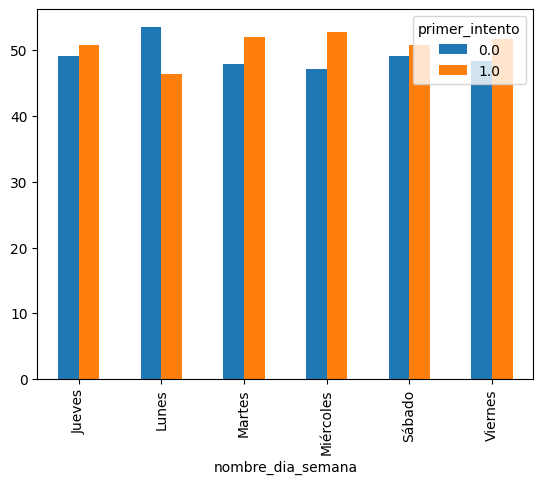

In [110]:
# Gráfico de barras de primer entrega segun nombre_dia_semana
plot = pd.crosstab(index = data['nombre_dia_semana'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

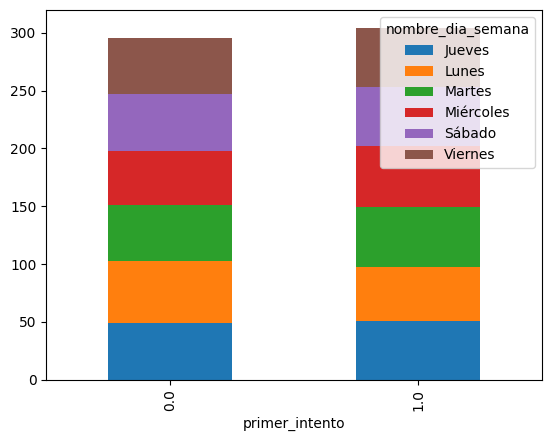

In [111]:
# Gráfico de barras de primera entrega segun nombre_dia_semana

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['nombre_dia_semana']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Cubrimiento

In [112]:
# Tabla de contingencia cubrimiento/ primer_intento

pd.crosstab(index = data['primer_intento'],
            columns = data['cubrimiento'], margins=True)

cubrimiento,A,B,C,D,E,All
primer_intento,,,,,,
0.0,53407,22987,3336,5119,3016,87865
1.0,61012,19376,2747,4562,2140,89837
All,114419,42363,6083,9681,5156,177702


In [113]:
# tabla de contingencia en porcentajes relativos total

pd.crosstab(index = data['primer_intento'], columns = data['cubrimiento'],
            margins=True).apply(lambda r: r/len(data) *100,
                                axis=1)

cubrimiento,A,B,C,D,E,All
primer_intento,,,,,,
0.0,30.054079,12.935629,1.877290,2.880649,1.697214,49.444860
1.0,34.333692,10.903586,1.545838,2.567205,1.204257,50.554577
All,64.387771,23.839215,3.423127,5.447854,2.901470,99.999437


In [114]:
# tabla de contingencia en porcentajes relativos segun primer entrega

pd.crosstab(index = data['primer_intento'], columns = data['cubrimiento']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

cubrimiento,A,B,C,D,E
primer_intento,,,,,
0.0,60.783019,26.161725,3.796734,5.825983,3.432539
1.0,67.914111,21.567951,3.057760,5.078086,2.382092


In [115]:
# tabla de contingencia en porcentajes relativos segun cubrimiento

pd.crosstab(index = data['primer_intento'], columns = data['cubrimiento']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

cubrimiento,A,B,C,D,E
primer_intento,,,,,
0.0,46.676688,54.261974,54.841361,52.876769,58.494957
1.0,53.323312,45.738026,45.158639,47.123231,41.505043


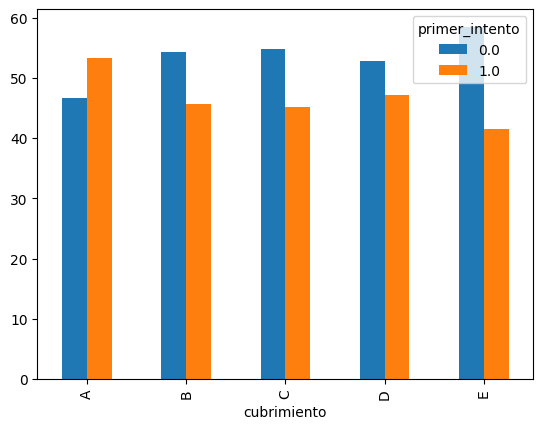

In [116]:
# Gráfico de barras de primer entrega segun cubrimiento
plot = pd.crosstab(index = data['cubrimiento'],
            columns =  data['primer_intento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

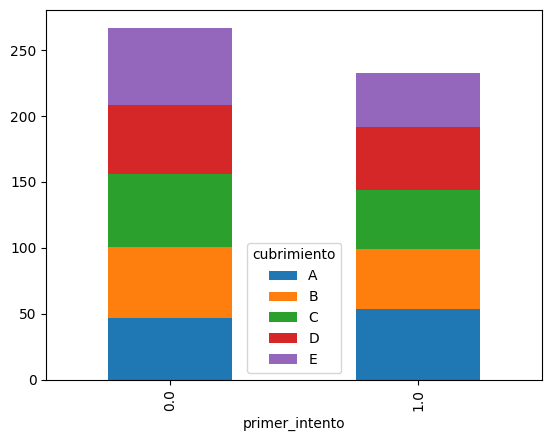

In [117]:
# Gráfico de barras de primera entrega segun cubrimiento

plot = pd.crosstab(index =  data['primer_intento'],
            columns = data['cubrimiento']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

# Limpieza

In [5]:
data_c = data.copy()
data_c.head()

,idguia,fechacomprobacionfisica,nombre_dia_semana,producto,ciudad_origen,ciudad_destino,departamento_destino,zona,barrio,biometrico,...,tipo_id_titular,tipo_tarjeta,documentos_a_diligenciar,forzar_cambio_direccion,tipo_cliente,direccion,calificacion,entregas,devoluciones,primer_intento
0,38329078,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,PEREIRA,RISARALDA,NaN,,NaN,...,1.0,MASTERCARD JOVEN,NaN,NaN,NaN,QUINTAS DE PINDANA CS 12,2.0,1.0,1.0,0.0
1,38329779,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,PEREIRA,RISARALDA,NaN,ZONA DEPORTIVA VILLA OLIMPICA Olimpica,NaN,...,1.0,VISA CLASICA,NaN,NaN,NaN,CR 25 85 80 CJ SAN SILVESTRE TR 3 AP 3103,10.0,1.0,NaN,1.0
2,38329635,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,ARMENIA,QUINDIO,NaN,CLARITA Comuna 6 - San José,NO,...,1.0,MASTERCARD CLASICA,NaN,NaN,NaN,CL 37 27 107,10.0,1.0,NaN,1.0
3,38329014,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,MANIZALES,CALDAS,NaN,El Trebol Comuna 8 - Palogrande,NO,...,1.0,MASTERCARD BLACK,NaN,NaN,NaN,CR 27 81 C 04 CA 20,8.0,1.0,NaN,1.0
4,38329119,2022-07-01,Viernes,PROCESOS ESPECIALES CER,PEREIRA,MANIZALES,CALDAS,NaN,Alta Suiza Comuna 6 - Ecoturistico Cerro De Oro,NO,...,1.0,MASTERCARD JOVEN,NaN,NaN,NaN,CR 18 A 76 08,9.0,1.0,NaN,1.0


In [6]:
data_c.columns

Index(['idguia', 'fechacomprobacionfisica', 'nombre_dia_semana', 'producto',
       'ciudad_origen', 'ciudad_destino', 'departamento_destino', 'zona',
       'barrio', 'biometrico', 'canal_de_venta', 'cubrimiento',
       'idtipo_tarjeta', 'planta_realce', 'segmento_cliente',
       'sucursal_radicacion', 'tipo_ciudad', 'tipo_entrega',
       'tipo_doc_autorizado', 'tipo_emision', 'tipo_id_titular',
       'tipo_tarjeta', 'documentos_a_diligenciar', 'forzar_cambio_direccion',
       'tipo_cliente', 'direccion', 'calificacion', 'entregas', 'devoluciones',
       'primer_intento'],
      dtype='object')

In [9]:
data_c = data_c[['nombre_dia_semana','producto','ciudad_origen','ciudad_destino','departamento_destino',
                 'biometrico', 'canal_de_venta', 'cubrimiento','idtipo_tarjeta', 'planta_realce', 'segmento_cliente',
                'sucursal_radicacion', 'tipo_ciudad', 'tipo_entrega',
                'tipo_doc_autorizado', 'tipo_emision', 'tipo_id_titular',
                'tipo_tarjeta', 'calificacion',
                'primer_intento']]

In [10]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084608 entries, 0 to 1084607
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   nombre_dia_semana     1076059 non-null  object
 1   producto              1084608 non-null  object
 2   ciudad_origen         1084608 non-null  object
 3   ciudad_destino        1084608 non-null  object
 4   departamento_destino  1084608 non-null  object
 5   biometrico            843068 non-null   object
 6   canal_de_venta        1084590 non-null  object
 7   cubrimiento           1084590 non-null  object
 8   idtipo_tarjeta        1084590 non-null  object
 9   planta_realce         1084590 non-null  object
 10  segmento_cliente      1084589 non-null  object
 11  sucursal_radicacion   1084589 non-null  object
 12  tipo_ciudad           1084589 non-null  object
 13  tipo_entrega          1084589 non-null  object
 14  tipo_doc_autorizado   1084588 non-null  object
 15

In [11]:
Y = np.array(data_c['primer_intento'])

X = data_c.drop('primer_intento', axis = 1)
X_labels = list(X.columns)
X.values

##X = X[['Education','Marital_Status','Segmento']].values

array([['Viernes', 'PROCESOS ESPECIALES CER', 'PEREIRA', ..., 1.0,
        'MASTERCARD JOVEN', 2.0],
       ['Viernes', 'PROCESOS ESPECIALES CER', 'PEREIRA', ..., 1.0,
        'VISA CLASICA', 10.0],
       ['Viernes', 'PROCESOS ESPECIALES CER', 'PEREIRA', ..., 1.0,
        'MASTERCARD CLASICA', 10.0],
       ...,
       ['Viernes', 'PROCESOS ESPECIALES CER', 'BOGOTA', ..., 1.0,
        'MASTERCARD DEBITO', 8.0],
       ['Viernes', 'PROCESOS ESPECIALES CER', 'BOGOTA', ..., 1.0,
        'MASTERCARD DEBITO', 9.0],
       ['Viernes', 'PROCESOS ESPECIALES CER', 'BOGOTA', ..., nan, nan,
        nan]], dtype=object)

In [ ]:
oneHotEncoder = OneHotEncoder(
    # -------------------------------------------------------------------------
    # Categories (unique values) per feature:
    # - ‘auto’ : Determine categories automatically from the training data.
    # - list : categories[i] holds the categories expected in the ith column.
    # The passed categories should not mix strings and numeric values within a
    # single feature, and should be sorted in case of numeric values.
    categories= 'auto',
    # -------------------------------------------------------------------------
    # Specifies a methodology to use to drop one of the categories per feature.
    # - None: retain all features (the default).
    # - ‘first’ : drop the first category in each feature. If only one category
    #   is present, the feature will be dropped entirely.
    # - ‘if_binary’ : drop the first category in each feature with two
    #   categories. Features with 1 or more than 2 categories are left intact.
    # - array : drop[i] is the category in feature X[:, i] that should be
    # dropped.
    drop=None,
    # -------------------------------------------------------------------------
    # Desired dtype of output.
    dtype=np.float64,
    # -------------------------------------------------------------------------
    # Whether to raise an error or ignore if an unknown categorical feature is
    # present during transform (default is to raise).
    # - 'error'
    # - 'ignore'
    handle_unknown="error",
)

oneHotEncoder_m = oneHotEncoder.fit_transform(X).todense()

In [ ]:
oneHotEncoder_m

In [125]:
oneHotEncoder.get_feature_names_out()

array(['idguia_38328921', 'idguia_38328922', 'idguia_38328923', ...,
       'devoluciones_20.0', 'devoluciones_25.0', 'devoluciones_nan'],
      dtype=object)

In [ ]:
data_c = data_c.drop(columns = ['nombre_dia_semana','producto','ciudad_origen','ciudad_destino','departamento_destino',
                 'biometrico', 'canal_de_venta', 'cubrimiento','idtipo_tarjeta', 'planta_realce', 'segmento_cliente',
                'sucursal_radicacion', 'tipo_ciudad', 'tipo_entrega',
                'tipo_doc_autorizado', 'tipo_emision', 'tipo_id_titular',
                'tipo_tarjeta', 'calificacion'])

In [ ]:
temp = pd.DataFrame(data = oneHotEncoder_m, columns = oneHotEncoder.get_feature_names_out(), index = range(data_c.shape[0]))
temp

In [ ]:
data_m = pd.concat([data_c, temp], axis=1)

In [ ]:
variables_modelo = ['primer_intento',]

In [ ]:
data_m = data_m[variables_modelo]
data_m.head()

In [ ]:
Y = np.array(data_m['primer_intento'])
#Y = np.array(score_final_m['Response'])
Y

In [ ]:
X_ = data_m.drop('primer_intento', axis = 1)
#X_ = score_final_m.drop('Response', axis = 1)
X_labels = list(X_.columns)

In [ ]:
X = np.array(X_)
X

In [ ]:
from sklearn.model_selection import StratifiedKFold

stratifiedKFold = StratifiedKFold(n_splits=4)

stratifiedKFold

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
train_X

In [ ]:
print('Training X Shape:', train_X.shape)
print('Training Y Shape:', train_Y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing Y Shape:', test_Y.shape)

# Modelo Random Forest para seleccion de vbles

In [ ]:
modelo = RandomForestRegressor(n_estimators = 30, random_state = 42)

In [ ]:
modelo.fit(train_X, train_Y)

In [ ]:
Y_pred = modelo.predict(test_X)

In [ ]:
importances = list(modelo.feature_importances_)

In [ ]:
X_importances=[(feature, round(importance, 2)) for feature, importance in zip(X_labels, importances)]

In [ ]:
X_importances = sorted(X_importances, key = lambda x: x[1], reverse = True)

In [ ]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in X_importances]

# Modelo predictivo

In [ ]:
# Lista de vbles seleccionadas en RF

vars_logit = ['primer_intento','']

In [ ]:
data_mp = data_m[vars_logit]
#data = score_final_m[vars_logit]
data_mp.head()

In [ ]:
data_mp.groupby("primer_intento").agg(Frequency=("primer_intento", "count")).sort_values('Frequency')

In [ ]:
Y2 = np.array(data['primer_intento'])
Y2

In [ ]:
X2 = data.drop('primer_intento', axis = 1)
X2_labels=list(X2.columns)

In [ ]:
X2 = np.array(X2)
X2

In [ ]:
model_reg=sm.Logit(Y2, X2)
model_reg_res = model_reg.fit()

In [ ]:
model_reg_res.summary()

### Entrenamiento del modelo

In [ ]:
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(X2, Y2, test_size = 0.25, random_state = 42)

In [ ]:
print('Training X2 Shape:', train_X2.shape)
print('Training Y2 Shape:', train_Y2.shape)
print('Testing X2 Shape:', test_X2.shape)
print('Testing Y2 Shape:', test_Y2.shape)

In [ ]:
modelo_regresion=LogisticRegression().fit(train_X2, train_Y2)

In [ ]:
modelo_regresion.classes_

In [ ]:
modelo_regresion.coef_

In [ ]:
Y_predict=modelo_regresion.predict(test_X2)
Y

#### Accuracy

In [ ]:
modelo_regresion.score(test_X2, test_Y2)

#### Matriz de confusion

In [ ]:
confusion_matrix_ = confusion_matrix(test_Y2, Y_predict)
confusion_matrix_

In [ ]:
class_names = ['No acepta', 'Acepta']
dataframe = pd.DataFrame(confusion_matrix_, index=class_names, columns=class_names)

# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, fmt="d")
plt.title("Matriz de confusion para muestra de prueba"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(test_Y2, Y_predict))

In [ ]:
# Se calcula la precisión del modelo

precision = precision_score(test_Y2, Y_predict)
print('Precisión del modelo: '+ str(precision))

In [ ]:
# Se calcula la exactitud del modelo

exactitud = accuracy_score(test_Y2, Y_predict)
print('Exactitud del modelo: ' + str(exactitud))

In [ ]:
# Se calcula la sensibilidad del modelo

sensibilidad = recall_score(test_Y2, Y_predict)
print('Sensibilidad del modelo: '+ str(sensibilidad))

In [ ]:
# Se calcula el puntaje F1 del modelo

puntajef1 = f1_score(test_Y2, Y_predict)
print('Puntaje F1 del modelo: '+ str(puntajef1))

In [ ]:
# Se calcula la curva ROC - AUC del modelo


roc_auc = roc_auc_score(test_Y2, Y_predict)
print('Curva ROC - AUC del modelo: '+ str(roc_auc))

In [ ]:
fpr, tpr, _ = roc_curve(test_Y2, Y_predict)
auc = roc_auc_score(test_Y2, Y_predict)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.title("Curva ROC para muestra de prueba"), plt.tight_layout()
plt.legend(loc=4)
plt.show()